# The final assignment of Datat Science Methodology
___________________________________________________________
#### in this exercise we aim to apply main phases of data analysis methodology against a chosen problem like spam detector, as is explained bellow:

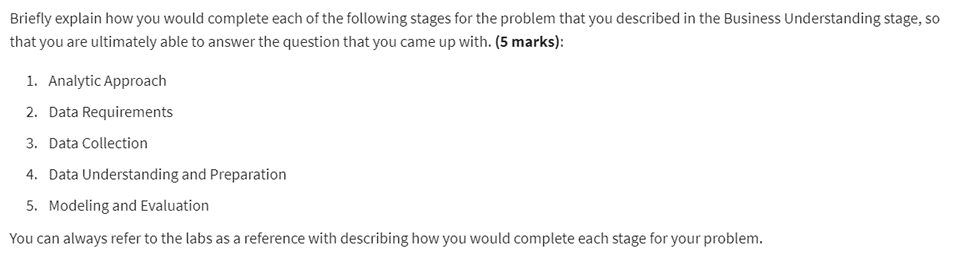

### Introduction
The classification of emails is a well-known and frequently used example to describe and simulating data analysis methodology. I have selected this example due to its clear and simple nature, which makes it ideal for explaining the process of analysis and modelling.‎‏ ‏‎ In this problem, ‎as all too often, the goal is to identify receiving emails as Spam or notSpam.‎

## 1-	Analytic Approach
As mentioned, spam detection is known as a classic scenario of classification. Therefore, our goal should be to develop a classifier model that can identify the category of an email as “Spam”, or “notSpam” based on the email’s features value.
The most suitable analytical approach for the problem of email classification is supervised machine learning algorithms. Some common supervised learning algorithms used for email classification include: Naive Bayes, Decision Trees, Support Vector Machines (SVM), Random Forest, and Neural Networks. However, Neural Networks demand large amount of labelled data and computational resources. 
in this problem, Decision Tree is my proposed solution.

## 2-  Data Requirements
the data requirements for decision-tree classification. This includes identifying the necessary ‎data content, formats and sources for initial data collection
‎1. Data Collection: Gather a diverse and representative dataset of emails that cover the different ‎categories you want to classify. Ensure the dataset includes a mix of email subjects, bodies, and ‎other relevant features.‎
In this stage first, we have to define the necessary data content, formats, and sources. In the ‎problem at hand, it is mainly those deterministic criteria and information which can be used to ‎recognize an email's category. The data should be represented in a structured format, typically as a ‎record for each email, containing the necessary elements. Then the available and potential ‎resources of needed data would be listed. The common data sources for email classification are:  ‎open labelled datasets, email archives, public APIs provided for this purpose, web scraping, and ‎users feedback. The data format, the amount and time period of the collected data, and the ‎sampling method are among other aspects to be addressed in this phase.‎

## 3-  Data Collection
In this phase, we came up with a dataset containing the typical key features of an email and one column as the target label named “Spam” which takes a binary value of yes/no. The raw data consists of 205 rows, with each row representing an individual email. It contains 7 features as follows:
* **Email Subject:** the email’s subject
* **Sender:** The email address of the sender.‎
* **Recipient:** The email address of the recipient.‎
* **Date:** Include the date and time when the email was sent. This information might be relevant for time-sensitive categorization or detecting email patterns.‎
* **Body:** contains the content of the email
* **Contains_Attachments:** A binary feature indicating whether the email ‎contains attachments (Yes/No).
* **Spam:** A binary feature indicating whether the email is marked as spam (Yes/No). (Note: This ‎could be a labeled field from a spam filter)

It is importante to note that, this data set is a simplified example with a few features and rows. However, in real-world scenarios, email classification data sets would require more diverse and extensive content to ensure accurate classification. Additionally, a second target label can be added to the dataset to address the categorization of non-spam emails in classes like: business, important, private, and etc. 

In [233]:
# increasing the margin of cells (more space between cells)

from IPython.core.display import HTML

HTML("""
<style>
    div.cell {
        margin-bottom: 20px !important;
    }
</style>
""")


In [1]:
# importing the primary libraries to read the data: 

In [2]:
import pandas as pd # import library to read data into dataframe
import numpy as np # import numpy library
import re # import library for regular expression
import random # library for random number generation

In [3]:
# Specify the file path of the CSV file
file_path = 'E:\Coursera\Data-Science-Methodology\email-raw-data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
print("Data has been successfully loaded into the dataframe!")

# Display the top rows of imported data
df.head()


Data has been successfully loaded into the dataframe!


,Email Subject,Sender,Recipient,Date,Body,Contains Attachments,Spam
0,Important offer inside!,marketing@example.com,user@example.com,6/1/2023,"Dear User, We have an exclusive offer waiting ...",No,Yes
1,Your order confirmation,sales@example.com,customer@example.com,6/2/2023,"Dear Customer, Thank you for your recent purch...",Yes,No
2,Urgent: Account security update,support@example.com,user@example.com,6/3/2023,"Dear User, We have noticed some unusual activi...",No,No
3,Exclusive discount for you,offers@example.com,customer@example.com,6/4/2023,"Dear Customer, You are one of our valued custo...",No,Yes
4,Your package is on its way!,shipping@example.com,customer@example.com,6/5/2023,"Dear Customer, Your package is on its way and ...",Yes,No


In [4]:
# To Get the dimensions of the dataframe, to ensure that data is entirly imported:
df.shape

(205, 7)

## 4- Data Understanding and preparation:

After importing the emails raw data into a pandas DataFrame, performing preliminary checks on the data is crucial to ensure data quality and suitability for analysis, and gain insights into the dataset. The outcome of this process could be: 
* understanding data content,
* assess data’s quality,
* discover any interesting preliminary insights, and determine whether additional data is necessary to fill any gaps in the data

In order to achieve the objectives mentioned above, we conduct the following preliminary checks:
- Carefully examine the structure, format, and data type of the data.
- Check for missing values in columns and determine the best approach for handling them (e.g., imputation, removal, etc.).
- Identify duplicate data and make a decision on whether to keep or delete them based on the problem's context.
- Analyze categorical columns to understand the values and distribution of categories.


In [5]:
# Use df.info() to check the data types of columns, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Email Subject         205 non-null    object
 1   Sender                205 non-null    object
 2   Recipient             205 non-null    object
 3   Date                  205 non-null    object
 4   Body                  205 non-null    object
 5   Contains Attachments  203 non-null    object
 6   Spam                  203 non-null    object
dtypes: object(7)
memory usage: 11.3+ KB


In [6]:
# Use df.isnull().sum() to check for missing values in each column.
df.isnull().sum()

Email Subject           0
Sender                  0
Recipient               0
Date                    0
Body                    0
Contains Attachments    2
Spam                    2
dtype: int64

In [7]:
# Use df.duplicated().sum() to check for duplicate rows in the DataFrame.
df.duplicated().sum()

48

In [8]:
# Check the unique values and frequencies of categorical columns using df['column'].value_counts()
print(df['Spam'].value_counts())
print(df['Contains Attachments'].value_counts())

No        104
Yes        89
 No         7
 Yes        3
Name: Spam, dtype: int64
No               169
Yes               24
 No                8
 Yes               2
Name: Contains Attachments, dtype: int64


In [9]:
# Check the unique values in the "date" column after the removal
unique_spam_values = df['Date'].unique()
print(unique_spam_values)

['6/1/2023' '6/2/2023' '6/3/2023' '6/4/2023' '6/5/2023' '6/6/2023'
 '6/7/2023' '6/8/2023' '6/9/2023' '6/10/2023' '6/11/2023' '6/12/2023'
 '6/13/2023' '6/14/2023' '6/15/2023' '6/16/2023' '6/17/2023' '6/18/2023'
 '6/19/2023' '6/20/2023' '6/21/2023' '6/22/2023' ' 2023-06-01 10:00:00 '
 ' 2023-06-02 15:30:00 ' ' 2023-06-03 09:00:00 ' ' 2023-06-04 12:45:00 '
 ' 2023-06-05 08:20:00 ' ' 2023-06-06 17:00:00 ' ' 2023-06-07 11:15:00 '
 ' 2023-06-08 14:30:00 ' ' 2023-06-09 09:45:00 ' ' 2023-06-10 13:20:00 '
 '6/23/2023' '6/24/2023' '6/25/2023' '6/26/2023' '6/27/2023' '6/28/2023'
 '6/29/2023' '6/30/2023' '7/1/2023' '7/2/2023' '7/3/2023' '7/4/2023'
 '7/5/2023' '7/6/2023' '7/7/2023' '7/8/2023' '7/9/2023' '7/10/2023'
 '7/11/2023' '7/12/2023' '7/13/2023' '7/14/2023' '7/15/2023' '7/16/2023'
 '7/17/2023' '7/18/2023' '7/19/2023' '7/20/2023' '7/21/2023' '7/22/2023'
 '7/23/2023' '7/24/2023' '7/25/2023' '7/26/2023' '7/27/2023' '7/28/2023'
 '7/29/2023' '7/30/2023' '7/31/2023' '8/1/2023' '8/2/2023' '8/3/2023'

###  Data Deficiencies Report
By applying the aforementioned checkings to the raw data, we have identified the following issues that need to be resolved:

1. Two missing values were found in columns X and Y. The simplest solution to this problem is to delete the rows containing missing values.

2. We have also discovered 48 duplicate data records. These duplicates must be removed.

3. The titles of the columns should be shortened without compromising their clarity and comprehensibility. Besides, it is preferable to use only lowercase letters in the column titles.

4. As is obseved, the type of all variables have been defined bydefault as object. In order to achieve data consistency and data optimization, we need to modify the type of some columns based on their nature.

5. To make the textual categorical data in the "Contains Attachments" and "Spam" columns compatible with the model, it is necessary to convert the Yes/No values to 1/0.

6. The values in the "date" column do not adhere to a consistent and usable format.

To tackle these problems, we will now rectify the data by making some adjustments.

To address the missing values problem:

In [10]:
# Drop rows with missing values in "Contains Attachments" and "Spam" columns
df = df.dropna(subset=["Contains Attachments", "Spam"])

# Reset the index of the cleaned DataFrame
df.reset_index(drop=True, inplace=True)

# Now, df contains the DataFrame with rows having NaN values removed from the "Contains Attachments" and "Spam" columns.
# To ensure that the missing valud container rows are removed correctly
print('The number of null values for each variable:')
df.isnull().sum()


The number of null values for each variable:


Email Subject           0
Sender                  0
Recipient               0
Date                    0
Body                    0
Contains Attachments    0
Spam                    0
dtype: int64

To address the duplicated rows in the dataset:

In [11]:
# Drop duplicate rows based on all columns
df = df.drop_duplicates()

# Reset the index of the DataFrame after removing duplicates
df.reset_index(drop=True, inplace=True)

# Now, df contains the DataFrame with duplicate rows removed.
# To ensure that the duplicated rows are removed correctly
print('the number of duoplicated rows: ',df.duplicated().sum())
print('The new dimensions of dataset are:',df.shape)

the number of duoplicated rows:  0
The new dimensions of dataset are: (155, 7)


Here, to ease access and reference to columns, we provide appropriate titles.

In [12]:
# Rename the columns with preferred titles
df.rename(columns={
    "Email Subject": "subject",
    "Sender": "sender",
    "Recipient": "recipient",
    "Date": "date",
    "Body": "body",
    "Contains Attachments": "attachment",
    "Spam": "spam"
}, inplace=True)

# Now, the columns of df will have the preferred titles.
# to view the modifies data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject     155 non-null    object
 1   sender      155 non-null    object
 2   recipient   155 non-null    object
 3   date        155 non-null    object
 4   body        155 non-null    object
 5   attachment  155 non-null    object
 6   spam        155 non-null    object
dtypes: object(7)
memory usage: 8.6+ KB


#### Creating a new instance of the source dataset

From here onwards, our intention is to apply certain structural adjustments to the dataset so that it becomes suitable for use in the model. These actions typically result in irreversible alterations to the data structure. it is common practice to create a new instance of the source dataset with text preprocessing and vectorization applied for the model's input, while also retaining the original text data for reference and analysis purposes.

In [39]:
# create a copy of dataset
df_convert = pd.DataFrame()

df_convert = df.copy()

# take a look at the copied data frame

df_convert.head()

,subject,sender,recipient,date,body,attachment,spam
0,Important offer inside!,marketing@example.com,user@example.com,6/1/2023,"Dear User, We have an exclusive offer waiting ...",No,Yes
1,Your order confirmation,sales@example.com,customer@example.com,6/2/2023,"Dear Customer, Thank you for your recent purch...",Yes,No
2,Urgent: Account security update,support@example.com,user@example.com,6/3/2023,"Dear User, We have noticed some unusual activi...",No,No
3,Exclusive discount for you,offers@example.com,customer@example.com,6/4/2023,"Dear Customer, You are one of our valued custo...",No,Yes
4,Your package is on its way!,shipping@example.com,customer@example.com,6/5/2023,"Dear Customer, Your package is on its way and ...",Yes,No


  In this step, we want to assign proper data types  to the mentioned features corresponding to their nature


In [40]:
# Convert the "date" variable to datetime type
df_convert['date'] = pd.to_datetime(df_convert['date'], errors='coerce')

#df_convert['date'].astype('datetime64')

# Convert the "attachment" and "spam" columns to categorical data type
df_convert['attachment'] = df_convert['attachment'].astype('category')
df_convert['spam'] = df_convert['spam'].astype('category')


Validating the format, value, and integrity of date and categorical columns:

In [41]:
# Display the value counts for the "Spam" column
print('value counts for the "spam" column:')
print(df_convert['spam'].value_counts())
print('.........................................')

# Display the value counts for the "Contains Attachments" column
print('value counts for the "attachment" column:')
print(df_convert['attachment'].value_counts())
print('.........................................')


# Check the unique values in the "date" column after the removal
unique_spam_values = df_convert['date'].unique()
print('value counts for the "date" column:')
print(unique_spam_values)
print('.........................................')

value counts for the "spam" column:
No        80
Yes       65
 No        7
 Yes       3
Name: spam, dtype: int64
.........................................
value counts for the "attachment" column:
No               127
Yes               18
 No                8
 Yes               2
Name: attachment, dtype: int64
.........................................
value counts for the "date" column:
['2023-06-01T00:00:00.000000000' '2023-06-02T00:00:00.000000000'
 '2023-06-03T00:00:00.000000000' '2023-06-04T00:00:00.000000000'
 '2023-06-05T00:00:00.000000000' '2023-06-06T00:00:00.000000000'
 '2023-06-07T00:00:00.000000000' '2023-06-08T00:00:00.000000000'
 '2023-06-09T00:00:00.000000000' '2023-06-10T00:00:00.000000000'
 '2023-06-11T00:00:00.000000000' '2023-06-12T00:00:00.000000000'
 '2023-06-13T00:00:00.000000000' '2023-06-14T00:00:00.000000000'
 '2023-06-15T00:00:00.000000000' '2023-06-16T00:00:00.000000000'
 '2023-06-17T00:00:00.000000000' '2023-06-18T00:00:00.000000000'
 '2023-06-19T00:00:00.000

As is observed, the column "date" has valid values in form of Date-Time. Nonetheless, the categorical variables suffer from inconsistency in taken values. To tackle this issue we change values of that two columns to numbers (i.e., "1" or "0")

In [42]:
# Preprocess the "spam" and "attachment" columns to remove leading and trailing whitespaces
df_convert['spam'] = df_convert['spam'].str.strip()
df_convert['attachment'] = df_convert['attachment'].str.strip()

# Create a mapping dictionary for "Yes" and "No" values to 1 and 0, respectively
yes_no_mapping = {"Yes": 1, "No": 0}

# Apply the mapping to the "spam" and "attachment" columns
df_convert['spam'] = df_convert['spam'].map(yes_no_mapping)
df_convert['attachment'] = df_convert['attachment'].map(yes_no_mapping)


# Verifying the outcome of the operation:

# Display the value counts for the "Spam" column
print(df_convert['spam'].value_counts())

# Display the value counts for the "Contains Attachments" column
print(df_convert['attachment'].value_counts())



0    87
1    68
Name: spam, dtype: int64
0    135
1     20
Name: attachment, dtype: int64


### More advance processes on data
So far, we have successfully tackled some preliminary deficiencies in the raw data. Moving forward, our next objective is to acquire a deeper understanding of the data and perform the necessary pre-processing to render the data suitable for the model's utilization.

### **Preparing Texual Features:**

Convert text to lowercase, remove punctuation, tokenize, and remove stop words.

In [43]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to lowercase for both 'subject' and 'body' in "df_convert"
df_convert['subject'] = df_convert['subject'].str.lower()
df_convert['body'] = df_convert['body'].str.lower()


# Remove punctuation
df_convert['subject'] = df_convert['subject'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_convert['body'] = df_convert['body'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


# Tokenize the 'body' column in "df_convert"
df_convert['body_tokens'] = df_convert['body'].apply(lambda x: x.split())
df_convert['subject_tokens'] = df_convert['subject'].apply(lambda x: x.split())


# Remove stop words from 'body_tokens' in "df_convert"
stop_words = set(stopwords.words('english'))
df_convert['body_tokens'] = df_convert['body_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
df_convert['subject_tokens'] = df_convert['subject_tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Calculate and store the length of the 'sender' and 'recipient' strings
df_convert['sender_length'] = df_convert['sender'].apply(len)
df_convert['recipient_length'] = df_convert['recipient'].apply(len)



Here,the modified dataset is shown, where two textual fields have been converted to lowercase, stopwords removed, and a new feature of email body tokens has been embedded into the dataset.

In [44]:
df_convert.head()

,subject,sender,recipient,date,body,attachment,spam,body_tokens,subject_tokens,sender_length,recipient_length
0,important offer inside,marketing@example.com,user@example.com,2023-06-01,dear user we have an exclusive offer waiting f...,0,1,"[dear, user, exclusive, offer, waiting, click,...","[important, offer, inside]",21,16
1,your order confirmation,sales@example.com,customer@example.com,2023-06-02,dear customer thank you for your recent purcha...,1,0,"[dear, customer, thank, recent, purchase, conf...","[order, confirmation]",17,20
2,urgent account security update,support@example.com,user@example.com,2023-06-03,dear user we have noticed some unusual activit...,0,0,"[dear, user, noticed, unusual, activity, accou...","[urgent, account, security, update]",19,16
3,exclusive discount for you,offers@example.com,customer@example.com,2023-06-04,dear customer you are one of our valued custom...,0,1,"[dear, customer, one, valued, customers, speci...","[exclusive, discount]",18,20
4,your package is on its way,shipping@example.com,customer@example.com,2023-06-05,dear customer your package is on its way and w...,1,0,"[dear, customer, package, way, delivered, soon...","[package, way]",20,20


### **Feature Engineering:** 

Create new features based on the existing ones or domain ‎knowledge. For example, extract features like email length or word count.


In [45]:
# Create a new feature for email word count
df_convert['word_count'] = df_convert['body_tokens'].apply(len)

# Create a new feature for email's body chars count
df_convert['email_length'] = df_convert['body'].apply(len)


### **Data Visualization:**  

Creating visualizations (e.g., histograms, bar charts) to exhebit the distribution of features, the relationship between variables, and potential patterns. As example, class distribution and email_length distribution are demonstrated here.

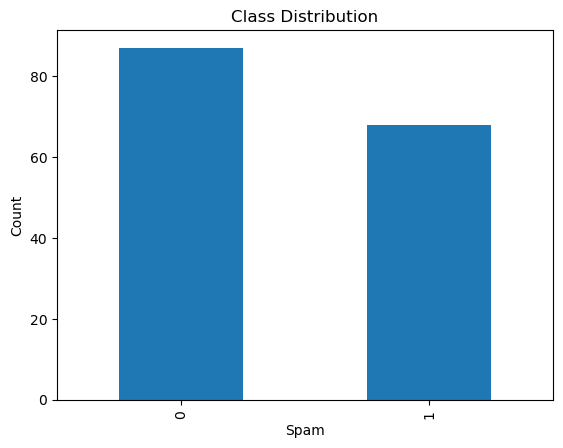

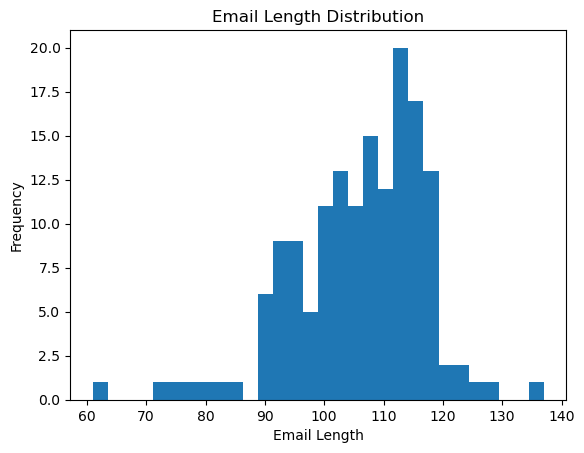

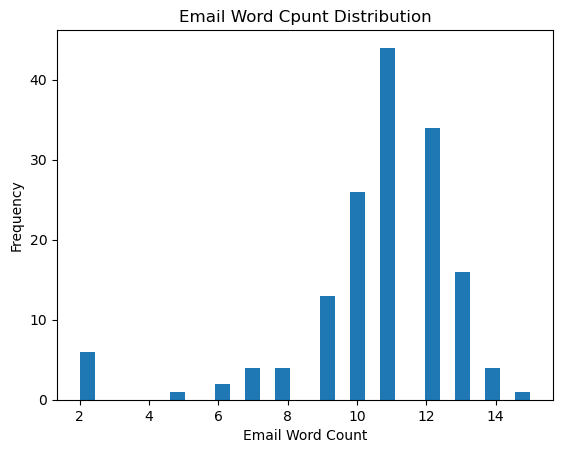

In [47]:
import matplotlib.pyplot as plt

# Bar chart for class distribution
df_convert['spam'].value_counts().plot(kind='bar')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Histogram for email length

df_convert['email_length'].plot(kind='hist', bins=30)
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.title('Email Length Distribution')
plt.show()

# Histogram for word count
df_convert['word_count'].plot(kind='hist', bins=30)
plt.xlabel('Email Word Count')
plt.ylabel('Frequency')
plt.title('Email Word Cpunt Distribution')
plt.show()



### **Feature Analysis:**  

Analyzing the importance and relevance of each feature for email classification. Feature importance can be determined through statistical tests or correlation analysis. 
Correlation analysis aims to assess the relationship between each feature and the target variable (i.e., "spam") to determine which features have a strong influence on the classification task. To this purpose the following steps can be performed:

* First, we need to ensure that all the evaluated features are in numerical format. in addition to the existing numerical features, we can also represent the date as the number of days from a reference date or use any other numerical representation suitable for the data.

In [48]:
# Convert the "date" column to the number of days since a reference date
df_convert['date'] = (df_convert['date'] - pd.to_datetime('2023-01-01')).dt.days

# to see the applied modifications in DataFrame up to this point
df_convert.head()


,subject,sender,recipient,date,body,attachment,spam,body_tokens,subject_tokens,sender_length,recipient_length,word_count,email_length
0,important offer inside,marketing@example.com,user@example.com,151,dear user we have an exclusive offer waiting f...,0,1,"[dear, user, exclusive, offer, waiting, click,...","[important, offer, inside]",21,16,9,94
1,your order confirmation,sales@example.com,customer@example.com,152,dear customer thank you for your recent purcha...,1,0,"[dear, customer, thank, recent, purchase, conf...","[order, confirmation]",17,20,10,119
2,urgent account security update,support@example.com,user@example.com,153,dear user we have noticed some unusual activit...,0,0,"[dear, user, noticed, unusual, activity, accou...","[urgent, account, security, update]",19,16,12,124
3,exclusive discount for you,offers@example.com,customer@example.com,154,dear customer you are one of our valued custom...,0,1,"[dear, customer, one, valued, customers, speci...","[exclusive, discount]",18,20,9,107
4,your package is on its way,shipping@example.com,customer@example.com,155,dear customer your package is on its way and w...,1,0,"[dear, customer, package, way, delivered, soon...","[package, way]",20,20,10,106


* Next, we can calculate the correlation between each feature and the "spam" column using the corr() method in pandas. Positive correlations indicate a positive relationship with the target (spam), while negative correlations indicate an inverse relationship.

In [145]:
# Calculate correlation between features and the target variable "spam"
correlation_matrix = df_convert.corr()

# Check the correlation matrix
print(correlation_matrix['spam'])


date                0.111281
attachment         -0.185155
spam                1.000000
sender_length       0.056407
recipient_length   -0.236095
word_count          0.097849
email_length       -0.064424
Name: spam, dtype: float64


C:\Users\Iraj\AppData\Local\Temp\ipykernel_21924\2538411704.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_convert.corr()


According to The outcomes, the target variable shows a low correlation with the numerical attributes which greatly diminish the chance of establishing a meaningful connection between them. It is important to note that this situation is mostly influenced by the use of unrealistic raw data in this particular exercise. however, in real-world situations, the relationship between variables offers valuable insights to data analysts.

### Feature Slection
According to the results obtained from the correlation evaluation of the numerical components of the dataset with the target variable, it is observed that the two characteristics 'email_length' and 'sender_length' have the most negligible dependence. Therefore, they are removed from the list of features of interest for the final modelling. Based on this, columns 'date', 'attachment', 'recipient_length' and 'word_count' along with two primary features, 'body' and 'subject' will form the final list of our variables.

### **Text Vectorization:** 

In this context, text vectorization is used to convert the text-based columns (in this case, 'subject_tokens' and 'body_tokens') into numerical representations that can be used for modeling. The goal is to create a single matrix that includes both non-textual variables and numerical representatives of textual features.
Techniques like Bag-of-Words, TF-IDF, or word embeddings can be used for text vectorization. Here's how you can perform text vectorization using TF-IDF and integrate it with the numerical equivalent of other attributes in question:

By exlusion of textual columns and trivial attributes, `non_textual_features` contains only the intended numeric and categorical features that will be concatenated with the TF-IDF matrices during the final step before splitting the data into training and testing sets. It is noteworthy that 'spam', as the target variable, would not be included in that dataset as well.

This step ensures that the final `tfidf_matrix` contains the integrated numerical representations of both text and non-textual features, making it ready for use in machine learning models. The non-textual features include columns like 'attachment', 'date', 'word_count', 'email_length', etc., which were already preprocessed and converted to numerical values.

In [59]:

# TF-IDF Vectorization for "subject_tokens"
tfidf_subject = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_subject_matrix = tfidf_subject.fit_transform(df_convert['subject_tokens'].apply(lambda x: ' '.join(x)))

# TF-IDF Vectorization for "body_tokens"
tfidf_body = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_body_matrix = tfidf_body.fit_transform(df_convert['body_tokens'].apply(lambda x: ' '.join(x)))

# Concatenate the TF-IDF matrices with other non-textual features
import numpy as np

# Create a numpy array with non-textual features and important features through excluding 'spam' (as the target variable) and other unwanted columns.
non_textual_features = df_convert.drop(columns=['spam', 'subject', 'subject_tokens', 'body', 'body_tokens', 'sender', 'recipient','sender_length', 'email_length'])

# to see the data frame structure after droping unnecessary columns
print(non_textual_features.head())

# Convert the non-textual features to a numpy array
non_textual_matrix = non_textual_features.to_numpy()

# Concatenate the TF-IDF matrices for 'subject' and 'body' with the non-textual matrix horizontally
tfidf_matrix = np.hstack((tfidf_subject_matrix.toarray(), tfidf_body_matrix.toarray(), non_textual_matrix))

# Now, tfidf_matrix contains the integrated numerical representation of both text and non-textual features
print('to see the resulted tfidf_matrix content:')
print(tfidf_matrix)

   date  attachment  recipient_length  word_count
0   151           0                16           9
1   152           1                20          10
2   153           0                16          12
3   154           0                20           9
4   155           1                20          10
to see the resulted tfidf_matrix content:
[[ 0.  0.  0. ...  0. 16.  9.]
 [ 0.  0.  0. ...  1. 20. 10.]
 [ 0.  0.  0. ...  0. 16. 12.]
 ...
 [ 0.  0.  0. ...  0. 14. 10.]
 [ 0.  0.  0. ...  0. 18. 12.]
 [ 0.  0.  0. ...  0. 14. 12.]]


### Data Splitting
The data splitting strategy you should use depends on your specific use case and the size of your dataset. Here are the two common data splitting strategies:

1. Train/Test Split:
   * In the train/test split strategy, you divide your dataset into two parts: a training set and a testing set.
   * The training set is used to train the decision tree model, and the testing set is used to evaluate its performance.
   * This approach is suitable when you have a relatively large dataset, and you want to train and evaluate the model quickly.
   * The typical split ratio is 80% for training and 20% for testing, but it can vary based on the dataset size and specific use case.

2. Train/Validation/Test Split:
   - In the train/validation/test split strategy, you divide your dataset into three parts: a training set, a validation set, and a testing set.
   - The training set is used to train the decision tree model, the validation set is used to tune hyperparameters and optimize the model, and the testing set is used to evaluate its final performance.
   - This approach is more suitable when you have a smaller dataset and want to fine-tune the model's hyperparameters or perform model selection.
   - The typical split ratio is 60-70% for training, 15-20% for validation, and 15-20% for testing. Again, the exact ratio can vary based on the dataset size and specific use case.

To decide which strategy to use, consider the size of your dataset and the complexity of your decision tree model. If you have a large dataset and want to quickly assess model performance, the train/test split strategy is often sufficient. On the other hand, if you have a smaller dataset or want to fine-tune your model, the train/validation/test split strategy can provide better insights into model performance.

Regardless of the strategy you choose, remember to keep the testing set completely separate from the training and validation sets to avoid data leakage and ensure unbiased evaluation of the model's performance. Cross-validation techniques, such as k-fold cross-validation, can also be used for more robust model evaluation.

-----------------------------------------------
To apply the train/validation/test strategy for splitting our data, we need to divide dataset into three parts: a training set, a validation set, and a testing set. Here's a step-by-step guide on how to do that:


1. Import the required libraries:

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split

2. Split the data into features (X) and the target variable (y):

In [67]:
X = tfidf_matrix
y = df_convert['spam']

3. Split the data into training and testing sets:

In [68]:
# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Split the training set further into training and validation sets:

In [69]:
# Split the training set into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Now, we have three sets:

- `X_train` and `y_train`: The training set, which is used to train your decision tree model.
- `X_val` and `y_val`: The validation set, which is used to fine-tune hyperparameters and optimize the model.
- `X_test` and `y_test`: The testing set, which is used to evaluate the final performance of the model.

## 5- Modelling and Evaluation

After splitting your data into training, validation, and testing sets, the next steps involve training the decision tree model, tuning hyperparameters using the validation set, and finally evaluating the model's performance on the testing set. 

### Model Training

In this step we initialize the Decision Tree Classifier and train it by the by the prepared sub-datasets `X_train` and `y_train`

1. Import the required libraries for the decision tree model:


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

2. Initialize the Decision Tree Classifier and train it on the training set:

In [139]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training set
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Model Tuning
To perform hyperparameter tuning for the Decision Tree model, we can use cross-validation with grid search. Grid search is a technique that exhaustively searches through a predefined hyperparameter grid and evaluates the model's performance using cross-validation to find the best combination of hyperparameters.

Here's the step-by-step process to carry out hyperparameter tuning using cross-validation with grid search:

In [140]:
# Example of hyperparameter tuning (max_depth parameter)
# Here, you can try different values for max_depth and select the best performing one.
# For simplicity, we are focused on 'max_depth', but you can explore other hyperparameters (e.g., 'min_samples_split'and min_samples_leaf') as well.

# Define the hyperparameter grid to search through:

param_grid = {
    'max_depth': [3, 4, 5, 7, 9, 12, 15]
}


# Perform grid search with cross-validation:

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model:
    
best_params = grid_search.best_params_
dt_classifier_tuned = grid_search.best_estimator_

# Evaluate the model on the validation set:
    
val_accuracy = dt_classifier_tuned.score(X_val, y_val)

# Print the results (the model's performance on the validation data):

print("Best Hyperparameters:", best_params)
print("Validation Accuracy:", val_accuracy)


Best Hyperparameters: {'max_depth': 4}
Validation Accuracy: 0.6


### Model Evaluation
In this part of the code, we are using the tuned Decision Tree classifier (dt_classifier_tuned) to make predictions on the test set (X_test). After making predictions, we proceed to calculate the evaluation metrics to assess the performance of the tuned model. The evaluation metrics we are calculating are:

1. Accuracy: It measures the proportion of correctly predicted instances out of all the instances in the test set. A higher accuracy score indicates better performance.

2. Precision: It is the ratio of true positive predictions to the total predicted positive instances. Precision represents the model's ability to correctly identify positive instances. Higher precision indicates fewer false positives.

3. Recall: Also known as sensitivity or true positive rate, it measures the proportion of true positive predictions to the actual positive instances in the test set. Recall represents the model's ability to correctly identify all positive instances, minimizing false negatives.

4. F1-Score: It is the harmonic mean of precision and recall and is used when there is an imbalance between positive and negative classes. F1-score provides a balanced performance metric, taking into account both precision and recall.


In [141]:
# Make predictions on the test set using the trained model
y_pred = dt_classifier_tuned.predict(X_test)

# Calculate evaluation metrics (accuracy, precision, recall, F1-score)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9032258064516129
Precision: 1.0
Recall: 0.8125
F1-Score: 0.896551724137931


The following code provides the visualization of the decision making process of our model. It might be helpful to gain a deeper understand about how the model works:

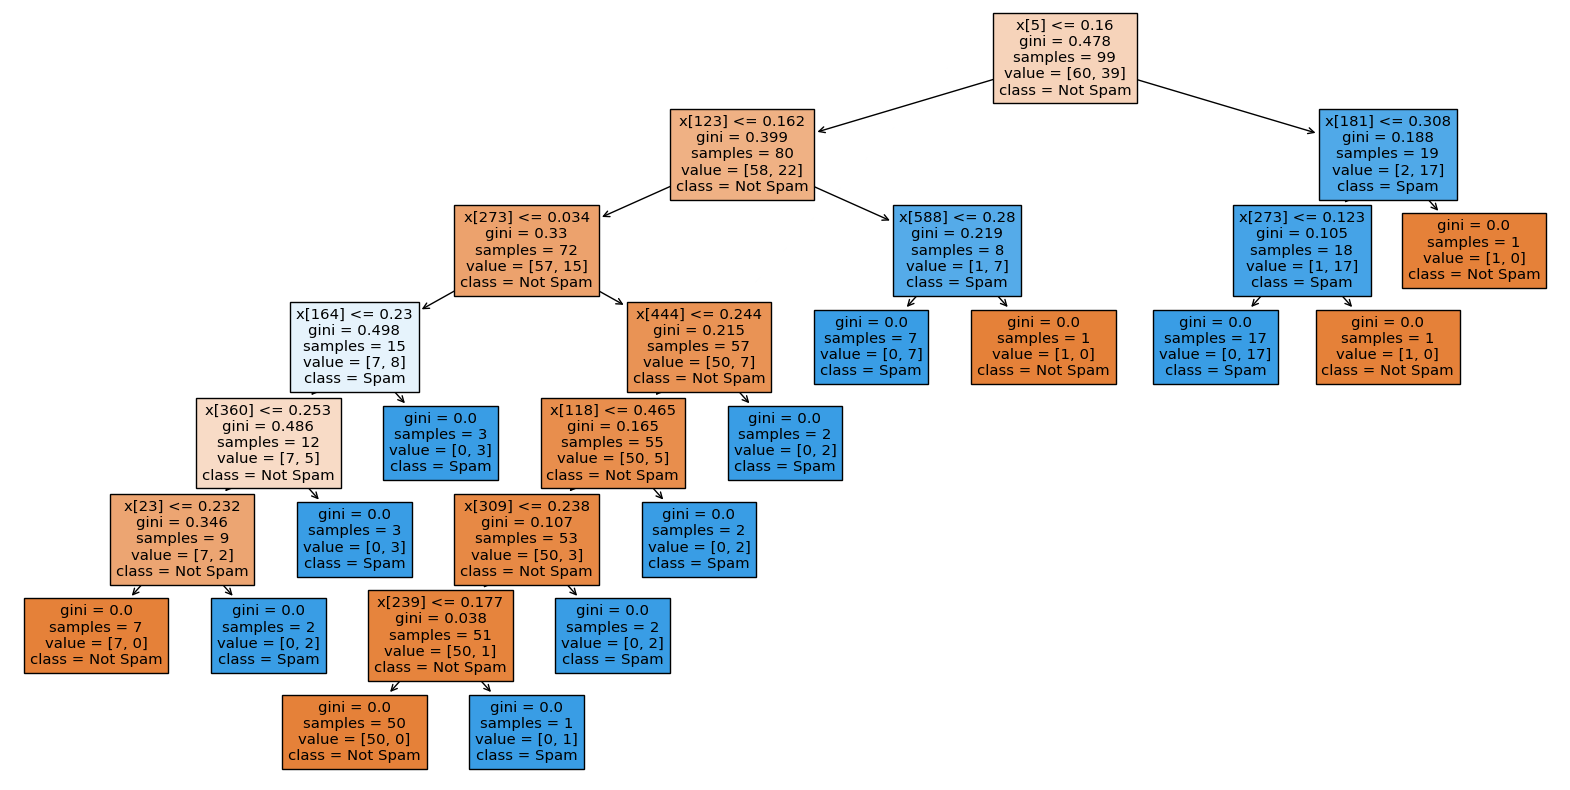

In [144]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=None, class_names=['Not Spam', 'Spam'], filled=True)
plt.show()
